# Project: Wrangling and Analyze Data

In [1]:
#import necessary libraries
import json
import os
import tweepy 
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from bs4 import BeautifulSoup 
import matplotlib.pyplot as plt
from timeit import default_timer as timer

## Data Gathering

Download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

-  read the twitter-archive-enhanced into a dataframe

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


Use the `Requests` library to download the tweet image predictions (image_predictions.tsv)

In [4]:
import requests # helps download url contents programmatically
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# Save tsv to file

with open("image_predictions.tsv", mode='wb') as file:
    file.write(response.content)
#read the image predictions into a dataframe
image_predictions= pd.read_csv('image_predictions.tsv', sep='\t') 

Use the `Tweepy` library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
# connect to the api and initialize API

consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token= 'HIDDEN'
access_secret = 'HIDDEN'

# create an authorization using the consumer key and secret
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# set access using your access token and secret
auth.set_access_token(access_token, access_secret)

#call the API
api = tweepy.API(auth, wait_on_rate_limit = True) #,  wait_on_rate_limit_notify= True)

In [6]:
#convert the tweet ids in the twitter_archive_df into a ist so we can iterate
tweet_ids = twitter_archive.tweet_id.to_list()
print(type(tweet_ids))
print(len(tweet_ids))

<class 'list'>
2356


We are interested in the `_json` attribute, so let's extract that.

In [ ]:
# retrieve the full JSON for the status of each id in twitter-archive-enhanced.csv
# This script takes over 35 minutes to run
failed_id = []
with open('tweet_json.txt', 'w', encoding='UTF-8') as json_file:
    for id_ in tweet_ids:
        try:
            tweet = api.get_status(id_)
            tweet = tweet._json
            json.dump(tweet, json_file)
            json_file.write('\n')
        except:
            print('Failed retrieving tweet with id ',id_)
            failed_id.append(id_)
    

In [8]:
# Read the contents of the created file and create a dataframe with the fields of interest 

df = []
with open('tweet_json.txt') as f:
    for line in f:
        tweet = (json.loads(line))
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        df.append({'retweet_count' : retweet_count,
                  'favorite_count' : favorite_count,
                  'tweet_id' : tweet_id})
        
retweet_fav = pd.DataFrame(df, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



We'll use the following methods to visually assess our dataframes
- sample
- head
- info
- duplicated
- describe

In [9]:
image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1980,871032628920680449,https://pbs.twimg.com/media/DBaHi3YXgAE6knM.jpg,1,kelpie,0.398053,True,macaque,0.068955,False,dingo,0.050602,False
1978,870656317836468226,https://pbs.twimg.com/media/DBUxSSTXsAA-Jn1.jpg,4,Pembroke,0.945495,True,Cardigan,0.045875,True,beagle,0.004329,True
1695,816336735214911488,https://pbs.twimg.com/media/C1Q17WdWEAAjKFO.jpg,1,Labrador_retriever,0.919330,True,kuvasz,0.049480,True,golden_retriever,0.011934,True
1974,869772420881756160,https://pbs.twimg.com/media/DBINZcxXgAQ-R6P.jpg,1,Pembroke,0.980148,True,Cardigan,0.019271,True,malamute,0.000136,True
1111,724046343203856385,https://pbs.twimg.com/media/CgxUTS_XEAAC0pv.jpg,1,boxer,0.826272,True,bull_mastiff,0.158595,True,Great_Dane,0.011859,True


In [10]:
image_predictions.shape

(2075, 12)

In [11]:
sum(image_predictions.duplicated())

0

In [12]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [13]:
twitter_archive.head(4)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None


In [14]:
twitter_archive.shape

(2356, 17)

In [15]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [16]:
sum(twitter_archive.duplicated())

0

In [17]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [18]:
twitter_archive.rating_denominator.value_counts().sort_index(ascending=False)

170       1
150       1
130       1
120       1
110       1
90        1
80        2
70        1
50        3
40        1
20        2
16        1
15        1
11        3
10     2333
7         1
2         1
0         1
Name: rating_denominator, dtype: int64

In [19]:
twitter_archive.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [20]:
# we check for duplicated IDs in the feeds dataframe
twitter_archive[twitter_archive.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [21]:
retweet_fav.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6999,33793
1,892177421306343426,5297,29313
2,891815181378084864,3477,22041
3,891689557279858688,7219,36916
4,891327558926688256,7753,35294


In [22]:
retweet_fav.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358 entries, 0 to 357
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        358 non-null    int64
 1   retweet_count   358 non-null    int64
 2   favorite_count  358 non-null    int64
dtypes: int64(3)
memory usage: 8.5 KB


In [23]:
retweet_fav.describe()

,tweet_id,retweet_count,favorite_count
count,3.580000e+02,358.000000,358.000000
mean,8.574690e+17,4686.857542,17938.145251
std,1.941552e+16,4621.068304,14780.796537
min,8.283618e+17,1.000000,0.000000
25%,8.392526e+17,2095.750000,9072.500000
50%,8.560723e+17,3511.500000,17124.000000
75%,8.746188e+17,5393.500000,24005.500000
max,8.924206e+17,37417.000000,108844.000000


### Quality 

`twitter_archive`

1. Some tweets are retweets or replies.
2. The tweet ids are stored as int datatype.
3. The `timestamp` column is not in datatime format.
4. Some dog names lke 'floffer' are capitalized.
5. Some rating denominators are higher than 10. 
6. the rows in sources columns are duplicated
7. Some rating numerators are decimal therefore recorded as float.

`retweet_fav` 

8. Retweet and favorite count are in float format.






### Tidiness issues

`twitter_archive`

1.  Data about dogs and tweets in a same dataset
2.   Dog stage is spread in four columns


`image_predictions`
3. Predictions are spread in three columns


`retweet_fav`
4. The `retweet_and_fav` dataset is split from the main dataset describing tweets




## Cleaning Data
In this section, we clean **all** of the issues we documented while assessing. 

We will start by making copies of the dataframes



In [24]:
# Make copies of original pieces of data
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
retweet_fav_clean = retweet_fav.copy()

### Issue: Some tweets are retweets

#### Define:
Remove all observations in the twitter_archive dataset that have values in the rows in_reply_to_status_id or retweeted_status_id. Then remove those two columns plus retweeted_status_user_id, retweeted_status_timestamp and in_reply_to_user_id



#### Code

In [25]:
twitter_archive_clean= twitter_archive_clean[(twitter_archive_clean['in_reply_to_status_id'].isna()== True) & (twitter_archive_clean['retweeted_status_id'].isna() == True)]

twitter_archive_clean= twitter_archive_clean.drop(['in_reply_to_status_id',
                            'in_reply_to_user_id',
                            'retweeted_status_id',
                            'retweeted_status_user_id',
                            'retweeted_status_timestamp'],
                            axis = 1)

#### Test

In [26]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


### Issue: The tweet ids are stored as int datatype

 

#### Define
Change the numeric datatypes for the tweet_id variable from int to object in the datasets


#### Code

In [27]:
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype(str)
image_predictions_clean['tweet_id'] = image_predictions_clean['tweet_id'].astype(str)
retweet_fav_clean['tweet_id'] = retweet_fav_clean['tweet_id'].astype(str)

#### Test

In [28]:
print(twitter_archive_clean.tweet_id.dtype)
print(image_predictions_clean.tweet_id.dtype)
print(retweet_fav_clean.tweet_id.dtype)

object
object
object


### Issue: The `timestamp` column is not in datatime format

#### Define
Change timestamp datatype in twitter_archive dataframe from object to datatime type

#### Code

In [29]:
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

#### Test

In [30]:
twitter_archive_clean.dtypes

tweet_id                           object
timestamp             datetime64[ns, UTC]
source                             object
text                               object
expanded_urls                      object
rating_numerator                    int64
rating_denominator                  int64
name                               object
doggo                              object
floofer                            object
pupper                             object
puppo                              object
dtype: object

### Issue: Retweet and favorite count are in float format.

#### Define
Change the datatypes for the retweet_count and favorite_count variables from float to int in tweets dataset

#### Code

In [33]:
#start by filling NaNs with 0, so the dtype conversion to int can work
retweet_fav_clean['retweet_count'] = retweet_fav_clean['retweet_count'].fillna(0).astype(int)
retweet_fav_clean['favorite_count'] = retweet_fav_clean['favorite_count'].fillna(0).astype(int)
retweet_fav_clean['retweet_count'] = retweet_fav_clean['retweet_count'].astype(int)
retweet_fav_clean['favorite_count'] = retweet_fav_clean['favorite_count'].astype(int)

#### Test

In [34]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                2097 non-null   object             
 8   doggo               2097 non-null   object             
 9   floofer             2097 non-null   object             
 10  pupper              2097 non-null   object             
 11  puppo               2097 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2

### Issue: Some rating denominators are higher than 10 

#### Define
Find the list of rating_denominator not equal to 10, then drop those rows


#### Code

In [59]:
not_ten = list(twitter_archive_clean.query("rating_denominator != 10").index)
twitter_archive_clean.drop(index=not_ten, inplace=True)

#### Test

In [60]:
twitter_archive_clean.query("rating_denominator != 10").index

Int64Index([], dtype='int64')

### Issue: the rows in sources columns are duplicated

#### Define
Delete the column

#### Code

In [58]:
twitter_archive_clean.drop("source",axis=1,inplace=True)

#### Test

In [ ]:
twitter_archive_clean.columns


### Issue: Some rating numerators are decimal therefore recorded as float. 


#### Define
Change datatype and use regex to extract the ratings numerators again from the text.



#### Code

In [55]:
twitter_archive_clean['rating_numerator'] = twitter_archive_clean['rating_numerator'].astype('float')

In [56]:
twitter_archive_clean['rating_numerator'] = twitter_archive_clean['text'].str.extract('(\d+\.*\d*\/\d+)', expand=False).str.split('/').str[0]

#### Test

In [57]:
print(twitter_archive.rating_numerator.dtype)

twitter_archive_clean.loc[twitter_archive_clean['tweet_id'] == 883482846933004288, 'rating_numerator']

int64


Series([], Name: rating_numerator, dtype: object)

### Issue: Data about dogs and tweets in a same dataset

#### Define
The `twitter_archive` sataset should be split into a tweets and dogs table. This is is that we can have information about dogs in one table and information about the tweets in another. 
Ratings and dog stages refer to dogs, whereas retweets and likes are related to the tweets.

#### Code

In [36]:
dogs = twitter_archive_clean[['tweet_id', 'name', 'doggo', 'floofer', 'pupper', 'puppo', 'rating_numerator', 'rating_denominator']].copy()
tweets = twitter_archive_clean.drop(['name', 'doggo', 'floofer', 'pupper', 'puppo', 'rating_numerator', 'rating_denominator'], axis=1)

#### Test

In [47]:
dogs.columns

Index(['tweet_id', 'name', 'rating_numerator', 'rating_denominator',
       'dog_stage'],
      dtype='object')

In [48]:
tweets.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls'], dtype='object')

### Issue: Dog stage is spread in four columns

#### Define
We have values as variables in the now called dogs table. We will melt the columns doggo, floofer, pupper, puppo into a new variable called dog_stage. Before melting, create a new column to identify those dogs with dog stage 'unknown'.


#### Code

In [37]:
# we want to create first an extra column to tag those dogs without a recognized stage. 
# This will help cleaning the dataset afterwards
def u(row):
    if row ['doggo'] == 'None' and row ['floofer'] == 'None' and row ['pupper'] == 'None' and row ['puppo'] == 'None':
        val = 'unknown'
    else:
        val ='None'
    return val

dogs['unknown'] = dogs.apply(u, axis=1)

In [38]:
dogs.sample()

,tweet_id,name,doggo,floofer,pupper,puppo,rating_numerator,rating_denominator,unknown
297,837110210464448512,Clark,None,None,pupper,None,13,10,None


In [39]:
# we melt the different dog stages into a new column calle 'dog_stage'
dogs = pd.melt(dogs, id_vars =['tweet_id', 'name', 'rating_numerator','rating_denominator'],
                     value_vars = ['doggo', 'floofer', 'pupper', 'puppo', 'unknown'],
                     var_name = 'dog_stage', 
                    value_name = 'value')

In [40]:
# clean the duplicated rows created in the preious process and drop the 'value' variable
dogs = dogs[dogs['value']!= 'None']
dogs = dogs.drop('value', axis=1)

#### Test

In [44]:
dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2108 entries, 9 to 10484
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2108 non-null   object
 1   name                2108 non-null   object
 2   rating_numerator    2108 non-null   int64 
 3   rating_denominator  2108 non-null   int64 
 4   dog_stage           2108 non-null   object
dtypes: int64(2), object(3)
memory usage: 98.8+ KB


### Issue: Some dog names lke 'floffer' are capitalized

 

#### Define
Make all the dog names into lowercase to maintain integrity

#### Code

In [49]:
dogs['dog_stage'] = dogs['dog_stage'].str.lower()

#### Test

In [ ]:
dogs['dog_stage'].value_counts()

unknown    1761
pupper      230
doggo        83
puppo        24
floofer      10
Name: dog_stage, dtype: int64

### Issue: The `retweet_and_fav` dataset is split from the main dataset describing tweets

#### Define
Merge `retweet_and_fav_clean` into `tweets`

#### Code

In [ ]:
retweet_fav_clean.info()

In [50]:
# merge both dataframes on 'tweet_id'. Left join to preserve all tweets, independent of whether retweet info
# could be retrieved through twitter's API
tweets = tweets.merge(retweet_fav_clean, how = 'left', on = 'tweet_id')

#### Test

In [51]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        2097 non-null   object             
 1   timestamp       2097 non-null   datetime64[ns, UTC]
 2   source          2097 non-null   object             
 3   text            2097 non-null   object             
 4   expanded_urls   2094 non-null   object             
 5   retweet_count   291 non-null    float64            
 6   favorite_count  291 non-null    float64            
dtypes: datetime64[ns, UTC](1), float64(2), object(4)
memory usage: 131.1+ KB


### Issue: Predictions are spread in three columns





#### Define
The different predictions, the confidence and the test whether the prediction is a dog or not need to be melted into four columns: prediction_number, prediction, confidence and dog


#### Code

In [52]:
image_predictions_clean.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [53]:
# This script iterates the melting process for the three categories of data: prediction, confidence and dog test. 

# create 'prediction_number' and 'prediction' columns
image_predictions_clean = pd.melt(image_predictions_clean, id_vars = ['tweet_id', 'jpg_url', 'img_num', 'p1_conf', 'p1_dog',
       'p2_conf', 'p2_dog', 'p3_conf', 'p3_dog'],
               var_name = 'prediction_number',
               value_name = 'prediction')

# create 'confidence' column
image_predictions_clean = pd.melt(image_predictions_clean, id_vars = ['tweet_id', 'jpg_url', 'img_num', 'p1_dog',
       'p2_dog', 'p3_dog', 'prediction_number', 'prediction'],
               var_name = 'to_delete',
               value_name = 'confidence')

# remove newly created duplicated rows
image_predictions_clean = image_predictions_clean[image_predictions_clean['prediction_number'] == image_predictions_clean['to_delete'].str[:2]]
# remove unnecesary column
image_predictions_clean = image_predictions_clean.drop('to_delete', axis=1)

# create 'dog' column
image_predictions_clean = pd.melt(image_predictions_clean, id_vars = ['tweet_id', 'jpg_url', 'img_num','prediction_number', 'prediction', 'confidence'],
               var_name = 'to_delete2',
               value_name = 'dog')

# remove newly created duplicated rows
image_predictions_clean = image_predictions_clean[image_predictions_clean['prediction_number'] == image_predictions_clean['to_delete2'].str[:2]]

# remove unnecesary column
image_predictions_clean = image_predictions_clean.drop('to_delete2', axis=1)
# remove 'p' from prediction number
image_predictions_clean['prediction_number'] = image_predictions_clean['prediction_number'].str[1]


#### Test

In [54]:
image_predictions_clean.sort_values(by = ['tweet_id', 'prediction_number']).head(9)

,tweet_id,jpg_url,img_num,prediction_number,prediction,confidence,dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,Welsh_springer_spaniel,0.465074,True
8300,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,2,collie,0.156665,True
16600,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,3,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,1,redbone,0.506826,True
8301,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,2,miniature_pinscher,0.074192,True
16601,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,3,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,1,German_shepherd,0.596461,True
8302,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,2,malinois,0.138584,True
16602,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,3,bloodhound,0.116197,True


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [61]:
# save the three tables to csv
tweets.to_csv('tweets.csv', sep=',', index=False)
dogs.to_csv('dogs.csv', sep=',', index=False)
image_predictions_clean.to_csv('predictions.csv', sep=',', index=False)

In [62]:
# create and save a master dataset. The key needs to be set to 'tweet_id' in order for the join to work.
twitter_archive_master = dogs.set_index('tweet_id').join(tweets.set_index('tweet_id'), on='tweet_id', how='left')
twitter_archive_master.to_csv('twitter_archive_master.csv', sep=',', index=False)

In [63]:
#read the master data into a dataframe
twitter_archive_master = pd.read_csv('twitter_archive_master.csv', sep=",")

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [68]:

twitter_archive_master.head(4)

,name,rating_numerator,rating_denominator,dog_stage,timestamp,source,text,expanded_urls,retweet_count,favorite_count
0,Cassie,14,10,doggo,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,6092.0,27943.0
1,Yogi,12,10,doggo,2017-07-09 21:29:42+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,2500.0,17933.0
2,None,12,10,doggo,2017-06-09 00:02:31+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very large dog. He has a date later. ...,https://twitter.com/dog_rates/status/872967104...,4560.0,24056.0
3,Napolean,12,10,doggo,2017-06-04 23:56:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Napolean. He's a Raggedy East Nicaragu...,https://twitter.com/dog_rates/status/871515927...,2939.0,17883.0


### Insights:
1. Which are the most common dog stage? Pupper
2. What's the relationship between retweets and likes?
3. What dog stage receives the best ratings?
4. What's the distribution for the retweet count?


#### 1. Which are the most common dog stages?

In [66]:
twitter_archive_master.dog_stage.value_counts()

unknown    1761
pupper      230
doggo        83
puppo        24
floofer      10
Name: dog_stage, dtype: int64

<AxesSubplot:>

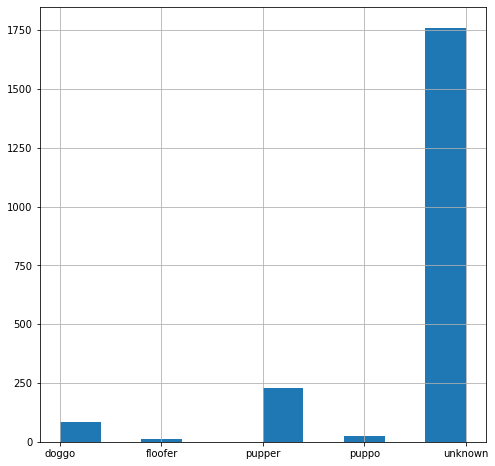

In [67]:
twitter_archive_master.dog_stage.hist(figsize=(8,8))

Pupper is the most common of the named/known dog stages, followed by doggo. 


#### 2. What's the relationship between retweets and likes?

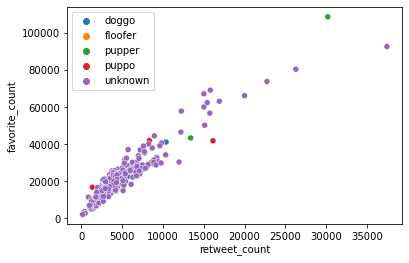

In [78]:
fig, ax= plt.subplots()
sns.scatterplot(data=twitter_archive_master, hue='dog_stage', x='retweet_count', y='favorite_count')
plt.legend(loc=2)
plt.show()


#### 3. What dog stage receives the best ratings?

(5.0, 120.0)

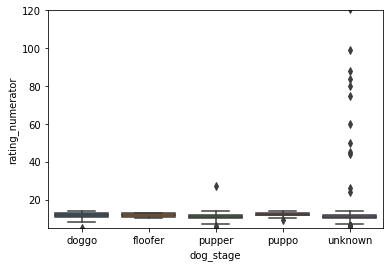

In [91]:
fig, ax= plt.subplots()
sns.boxplot(data=twitter_archive_master, x='dog_stage', y='rating_numerator')
plt.ylim(5,120)

#### 4. What's the distribution for the retweet count?

<AxesSubplot:>

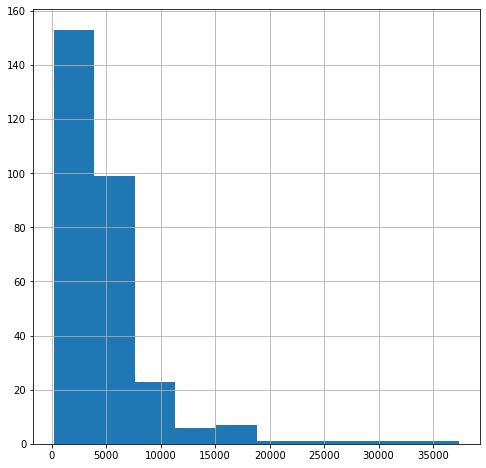

In [72]:
twitter_archive_master.retweet_count.hist(figsize=(8,8))